## Exploratory Data Analysis (2 samples, 10,000 random points)

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#flights table
data = pd.read_csv('/Users/Prashanta/Desktop/airplane_data/flights_table(50,000_points).csv',delimiter=';')
data = data.iloc[: , 1:]
display(data.head())
display(data.shape)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-30,WN,WN,WN,775,WN,N255WN,775,13495,MSY,...,674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AS,AS,AS,352,AS,N464AS,352,14747,SEA,...,672.0,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2018-11-21,DL,DL,DL,1312,DL,N912DL,1312,10994,CHS,...,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-19,WN,WN,WN,1967,WN,N7820L,1967,11697,FLL,...,994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-21,UA,UA_CODESHARE,UA,3908,ZW,N420AW,3908,14574,ROA,...,530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(50000, 42)

In [4]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

display(missing_data[missing_data['Total']>0])
display(data.shape)

,Total,Percent
no_name,50000,1.00000
total_add_gtime,49642,0.99284
first_dep_time,49642,0.99284
longest_add_gtime,49642,0.99284
cancellation_code,49173,0.98346
late_aircraft_delay,40654,0.81308
security_delay,40654,0.81308
nas_delay,40654,0.81308
weather_delay,40654,0.81308
carrier_delay,40654,0.81308


(50000, 42)

In [5]:
#create two samples of 10,000 points each
sample1 = data.sample(n=10000, random_state=0)
sample2 = data.sample(n=10000, random_state=1)

sample1['month'] = pd.DatetimeIndex(sample1['fl_date']).month
sample2['month'] = pd.DatetimeIndex(sample2['fl_date']).month
sample1['year'] = pd.DatetimeIndex(sample1['fl_date']).year
sample2['year'] = pd.DatetimeIndex(sample2['fl_date']).year


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

Observations:
* The delay forms a normal distribution however there is a tail which means there are some very lenghty delays. 
* Since we don't see a tail on the others side, this would mean that flights don't come to ahead of time


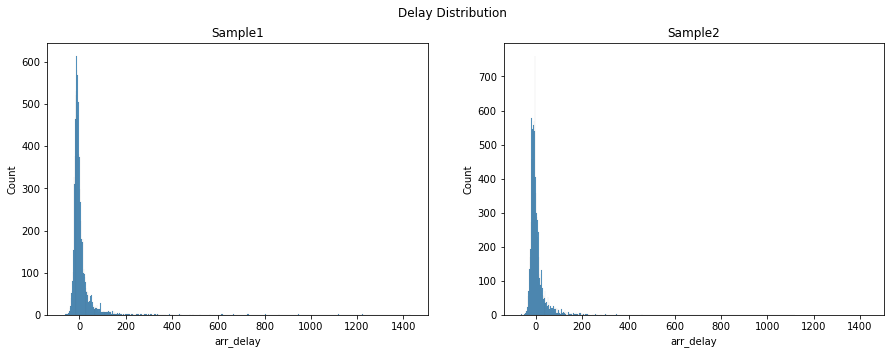

In [8]:
#create charts
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Delay Distribution')

#sample1 
sns.histplot(sample1['arr_delay'], ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.histplot(sample2['arr_delay'], ax=axes[1])
axes[1].set_title('Sample2')

print(
'''Observations:
* The delay forms a normal distribution however there is a tail which means there are some very lenghty delays. 
* Since we don't see a tail on the others side, this would mean that flights don't come to ahead of time'''
)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

Observations:
* There seems to be a great deal of variation in the average delay per month when using random datapoints
* Re-visit this with whole dataset, and seperate by year?
* Looks very seasonal (Fall,Winter,Spring,Summer)



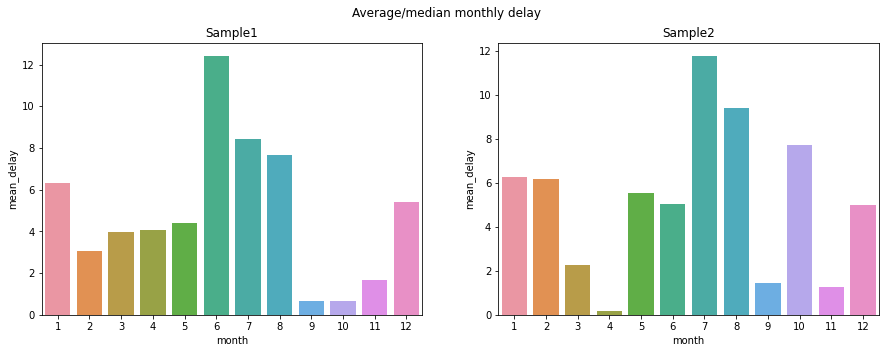

In [10]:
#data formatting
monthly_delay1 = sample1[['month','arr_delay']].groupby(by='month').agg(['size','mean','min','max']).reset_index()
monthly_delay1.columns = [''] * len(monthly_delay1.columns)
monthly_delay1.columns=['month','size','mean_delay','min_delay','max_delay']

monthly_delay2 = sample2[['month','arr_delay']].groupby(by='month').agg(['size','mean','min','max']).reset_index()
monthly_delay2.columns = [''] * len(monthly_delay1.columns)
monthly_delay2.columns=['month','size','mean_delay','min_delay','max_delay']

#create charts
fig, axes = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Average/median monthly delay')

#sample1 
sns.barplot(x='month',y='mean_delay',data=monthly_delay1,ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.barplot(x='month',y='mean_delay',data=monthly_delay2,ax=axes[1])
axes[1].set_title('Sample2')

print(
'''Observations:
* There seems to be a great deal of variation in the average delay per month when using random datapoints
* Re-visit this with whole dataset, and seperate by year?
* Looks very seasonal (Fall,Winter,Spring,Summer)
'''
)

Text(0.5, 1.0, 'sample2_2019')

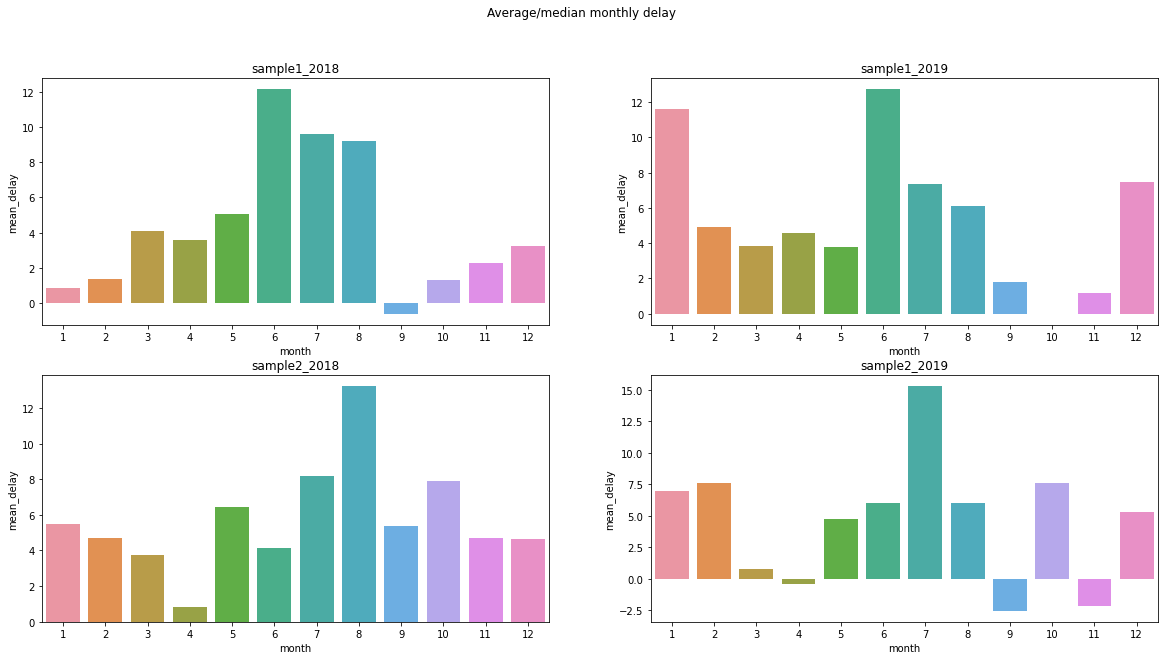

In [46]:
#data formatting
sample1_2018 = sample1[sample1['year']== 2018]
sample1_2019 = sample1[sample1['year']== 2019]

sample2_2018 = sample2[sample2['year']== 2018]
sample2_2019 = sample2[sample2['year']== 2019]

sample1_2018 = sample1_2018[['month','arr_delay']].groupby(by='month').agg(['size','mean','min','max']).reset_index()
sample1_2018.columns = [''] * len(sample1_2018.columns)
sample1_2018.columns=['month','size','mean_delay','min_delay','max_delay']

sample1_2019 = sample1_2019[['month','arr_delay']].groupby(by='month').agg(['size','mean','min','max']).reset_index()
sample1_2019.columns = [''] * len(sample1_2019.columns)
sample1_2019.columns=['month','size','mean_delay','min_delay','max_delay']

sample2_2018 = sample2_2018[['month','arr_delay']].groupby(by='month').agg(['size','mean','min','max']).reset_index()
sample2_2018.columns = [''] * len(sample2_2018.columns)
sample2_2018.columns=['month','size','mean_delay','min_delay','max_delay']

sample2_2019 = sample2_2019[['month','arr_delay']].groupby(by='month').agg(['size','mean','min','max']).reset_index()
sample2_2019.columns = [''] * len(sample2_2019.columns)
sample2_2019.columns=['month','size','mean_delay','min_delay','max_delay']

#create charts
fig, axes = plt.subplots(2, 2,figsize=(20,10))
fig.suptitle('Average/median monthly delay')

#sample1 - 2018
sns.barplot(x='month',y='mean_delay',data=sample1_2018,ax=axes[0,0])
axes[0,0].set_title('sample1_2018')

#sample1 - 2019
sns.barplot(x='month',y='mean_delay',data=sample1_2019,ax=axes[0,1])
axes[0,1].set_title('sample1_2019')

#sample2 - 2018
sns.barplot(x='month',y='mean_delay',data=sample2_2018,ax=axes[1,0])
axes[1,0].set_title('sample2_2018')

#sample2 - 2019
sns.barplot(x='month',y='mean_delay',data=sample2_2019,ax=axes[1,1])
axes[1,1].set_title('sample2_2019')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

Text(0.5, 1.0, 'Sample2')

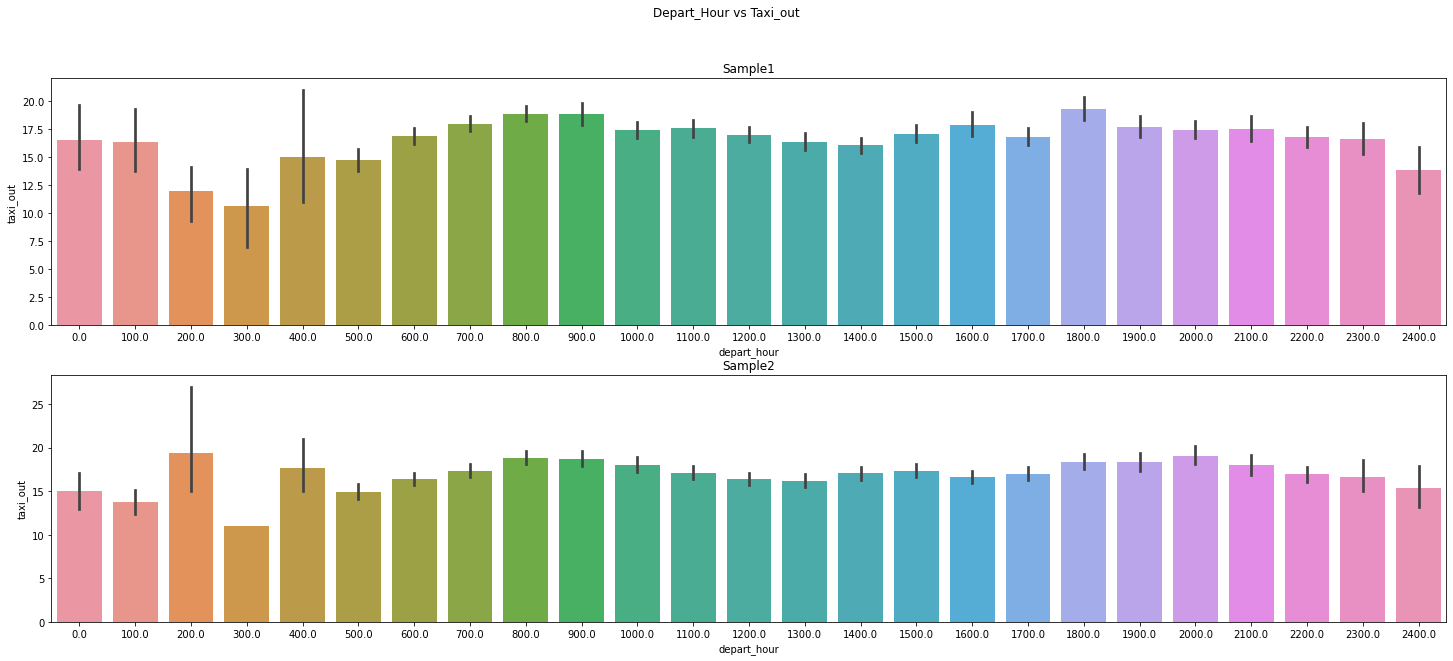

In [275]:
sample1['depart_hour'] = sample1['dep_time'].round(-2)
sample2['depart_hour'] = sample2['dep_time'].round(-2)

#create charts
fig, axes = plt.subplots(2, 1,figsize=(25,10))
fig.suptitle('Depart_Hour vs Taxi_out')

#sample1 
sns.barplot(x='depart_hour',y='taxi_out',data=sample1,ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.barplot(x='depart_hour',y='taxi_out',data=sample2,ax=axes[1])
axes[1].set_title('Sample2')

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [177]:
sample1_task5_1 = round(len(sample1[sample1['arr_delay']>0])/len(sample1)*100)
sample2_task5_2 = round(len(sample2[sample2['arr_delay']>0])/len(sample2)*100)
print('The average percentage of arrival delays?')
print('Sample1:',sample1_task5_1,'%')
print('Sample2:',sample2_task5_2,'%','\n')

sample1_task5_2 = round(len(sample1[sample1['dep_delay']>0])/len(sample1)*100)
sample2_task5_2 = round(len(sample2[sample2['dep_delay']>0])/len(sample2)*100)
print('The average percentage of delays that is already created before departure?')
print('Sample1:',sample1_task5_2,'%')
print('Sample2:',sample2_task5_2,'%','\n')

sample1_task5_3 = round(len(sample1[(sample1['arr_delay']>0) & (sample1['dep_delay']>0)])/len(sample1)*100)
sample2_task5_3 = round(len(sample2[(sample2['arr_delay']>0) & (sample2['dep_delay']>0)])/len(sample2)*100)
print('The average percentage of flights that depart late arrive late')
print('Sample1:',sample1_task5_3,'%')
print('Sample2:',sample2_task5_3,'%','\n')

print('Conclusion: 34% of flights arrive late')
print('Conclusion: 34% of flights depart late')
print('Conclusion: ~24-25% of flights that depart late arrive late which means that airlines are able to lower the delay during flights')

The average percentage of arrival delays?
Sample1: 34 %
Sample2: 34 % 

The average percentage of delays that is already created before departure?
Sample1: 34 %
Sample2: 34 % 

The average percentage of flights that depart late arrive late
Sample1: 24 %
Sample2: 25 % 

Conclusion: 34% of flights arrive late
Conclusion: 34% of flights depart late
Conclusion: ~24-25% of flights that depart late arrive late which means that airlines are able to lower the delay during flights


#### **Task 6**: How many states cover 50% of US air traffic? 

In [368]:
#sample 1 
sample1['origin_city_state'] = sample1['origin_city_name'].transform(lambda x: str(x).split(',')[1])
states_df_1 = (sample1.groupby(by='origin_city_state').size()).sort_values(ascending=False)
states_df_1 = states_df_1.to_frame().reset_index()
states_df_1.columns = ['state','flights']
states_df_1['%'] = round((states_df_1['flights'])/(len(states_df_1)))

#sample 2
sample2['origin_city_state'] = sample2['origin_city_name'].transform(lambda x: str(x).split(',')[1])
states_df_2 = (sample2.groupby(by='origin_city_state').size()).sort_values(ascending=False)
states_df_2 = states_df_2.to_frame().reset_index()
states_df_2.columns = ['state','flights']
states_df_2['%'] = round((states_df_2['flights'])/(len(states_df_2)))

print('Sample1:')
display(states_df_1.head())

print('Sample2:')
display(states_df_2.head())

Sample1:


,state,flights,%
0,CA,1089,21.0
1,TX,978,18.0
2,FL,705,13.0
3,IL,656,12.0
4,GA,523,10.0


Sample2:


,state,flights,%
0,CA,1058,20.0
1,TX,976,18.0
2,FL,739,14.0
3,IL,655,12.0
4,GA,540,10.0


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

Observations:
* Longer flights depart 11pm - 2 am
* Medium flights depart throughtout 7am - 10 pm
* Shorter fligts depart either early morning 5-6 am or or at late night 10-11 pm



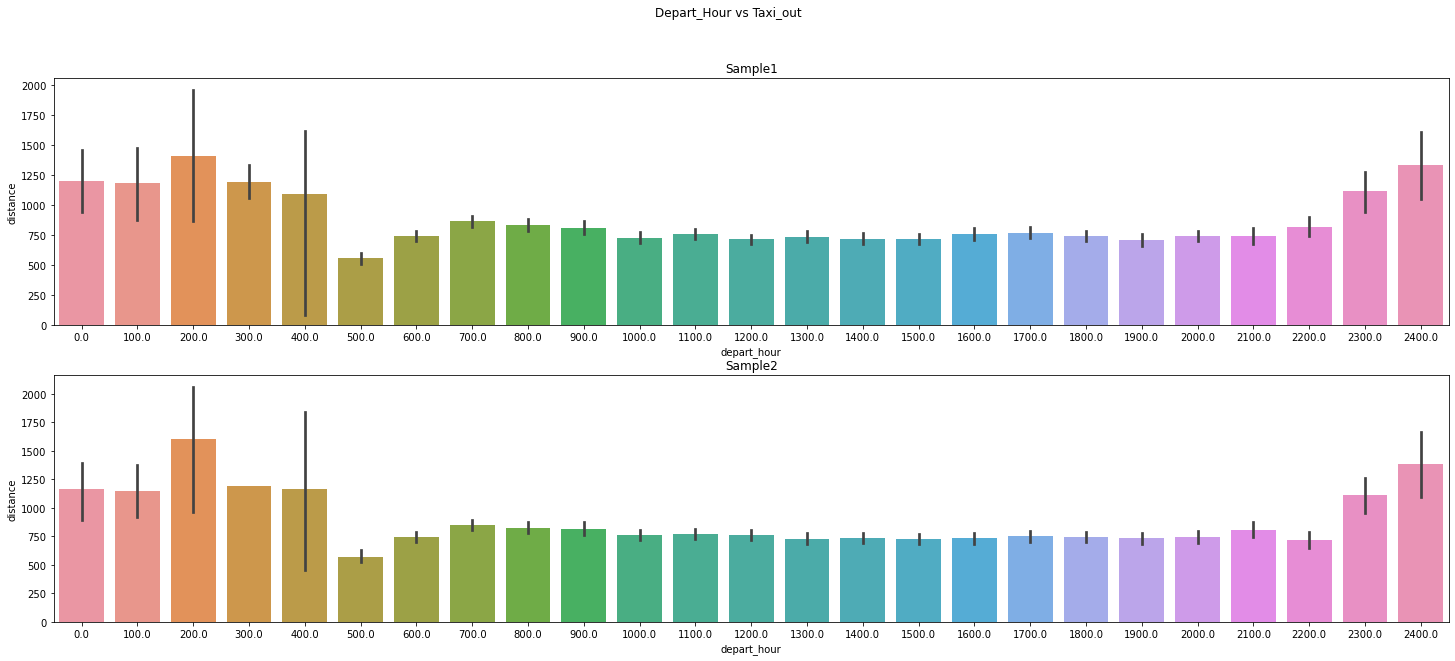

In [371]:
#create charts
fig, axes = plt.subplots(2, 1,figsize=(25,10))
fig.suptitle('Depart_Hour vs Taxi_out')

#sample1 
sns.barplot(x='depart_hour',y='distance',data=sample1,ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.barplot(x='depart_hour',y='distance',data=sample2,ax=axes[1])
axes[1].set_title('Sample2')

print(
'''Observations:
* Longer flights depart 11pm - 2 am
* Medium flights depart throughtout 7am - 10 pm
* Shorter fligts depart either early morning 5-6 am or or at late night 10-11 pm
'''
)

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

#### **Realtionship between Distance and Delay**

Observations:
* Doesn't seem to be any relationship



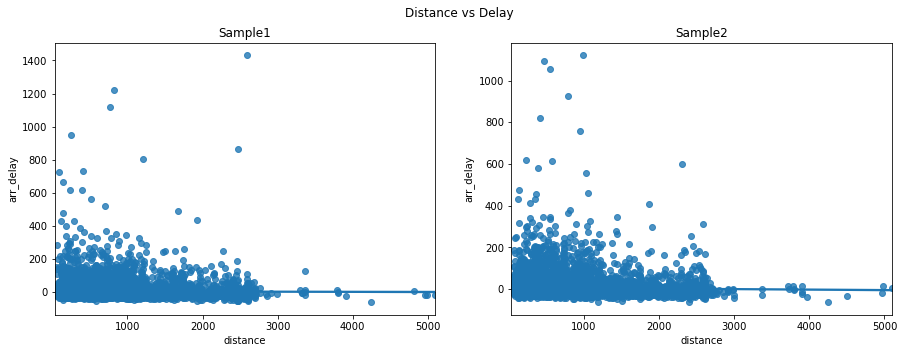

In [61]:
#create charts
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Distance vs Delay')

#sample1 
sns.regplot(x='distance',y='arr_delay',data=sample1,ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.regplot(x='distance',y='arr_delay',data=sample2,ax=axes[1])
axes[1].set_title('Sample2')

print(
'''Observations:
* Doesn't seem to be any relationship
'''
) 

#### **Realtionship between Taxi-out and Delay**

Observations:
* Doesn't seem to be any relationship



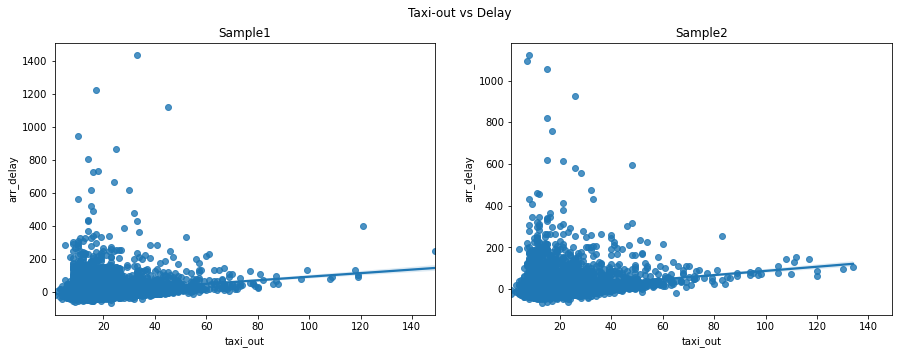

In [62]:
#create charts
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Taxi-out vs Delay')

#sample1 
sns.regplot(x='taxi_out',y='arr_delay',data=sample1,ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.regplot(x='taxi_out',y='arr_delay',data=sample2,ax=axes[1])
axes[1].set_title('Sample2')

print(
'''Observations:
* Doesn't seem to be any relationship
'''
)

#### **Realtionship between Dep-Delay & Arrival-Delay**

Observations:
* 



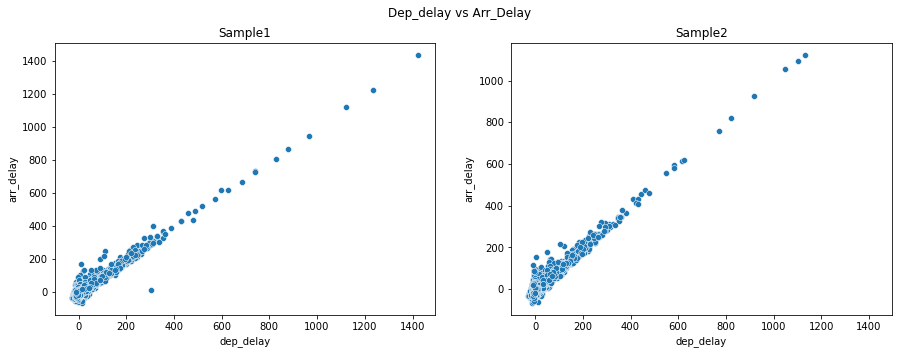

In [32]:
#create charts
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Dep_delay vs Arr_Delay')

#sample1 
sns.scatterplot(x='dep_delay',y='arr_delay',data=sample1,ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.scatterplot(x='dep_delay',y='arr_delay',data=sample2,ax=axes[1])
axes[1].set_title('Sample2')

print(
'''Observations:
* 
'''
)

#### **Looking at Outlier Data (arr_delay>200)**

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

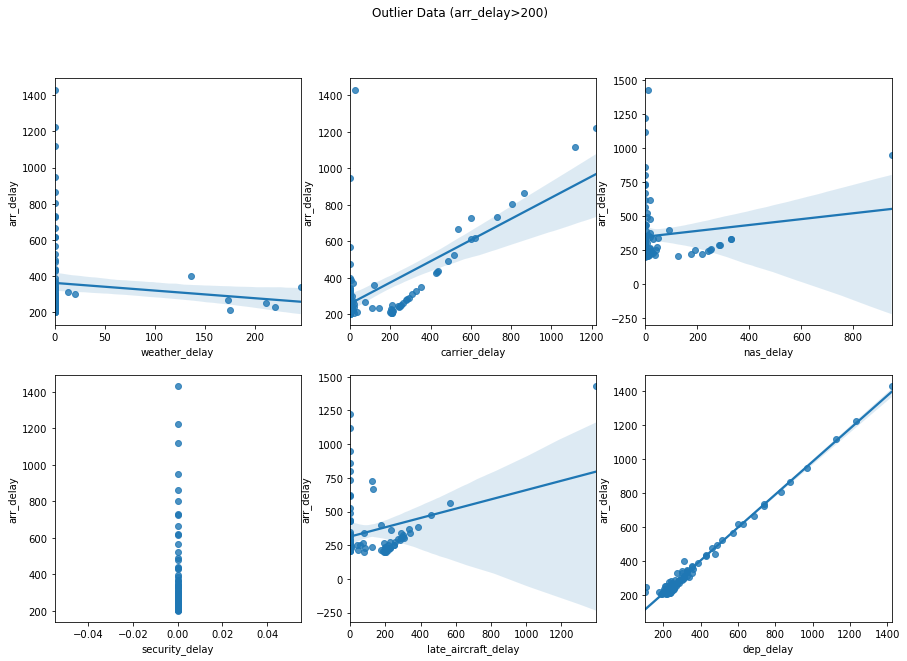

In [27]:
filter1 = sample1['arr_delay']>200
outliers = sample1[filter1][['origin_city_name','dest_city_name','arr_delay','dep_delay','weather_delay','carrier_delay','nas_delay','security_delay','late_aircraft_delay']]
outliers.head()

filter1 = sample1['arr_delay']>200
outliers = sample1[filter1][['origin_city_name','dest_city_name','arr_delay','dep_delay','weather_delay','carrier_delay','nas_delay','security_delay','late_aircraft_delay']]
outliers.head()

#create charts
fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Outlier Data (arr_delay>200)')

#weather_delay 
sns.regplot(x='weather_delay',y='arr_delay',data=outliers,ax=axes[0,0])

#carrier_delay
sns.regplot(x='carrier_delay',y='arr_delay',data=outliers,ax=axes[0,1])

#nas_delay 
sns.regplot(x='nas_delay',y='arr_delay',data=outliers,ax=axes[0,2])

#security_delay
sns.regplot(x='security_delay',y='arr_delay',data=outliers,ax=axes[1,0])

#late_aircraft_delay
sns.regplot(x='late_aircraft_delay',y='arr_delay',data=outliers,ax=axes[1,1])

#dep_delay
sns.regplot(x='dep_delay',y='arr_delay',data=outliers,ax=axes[1,2])

#### **Looking at Delay data**

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

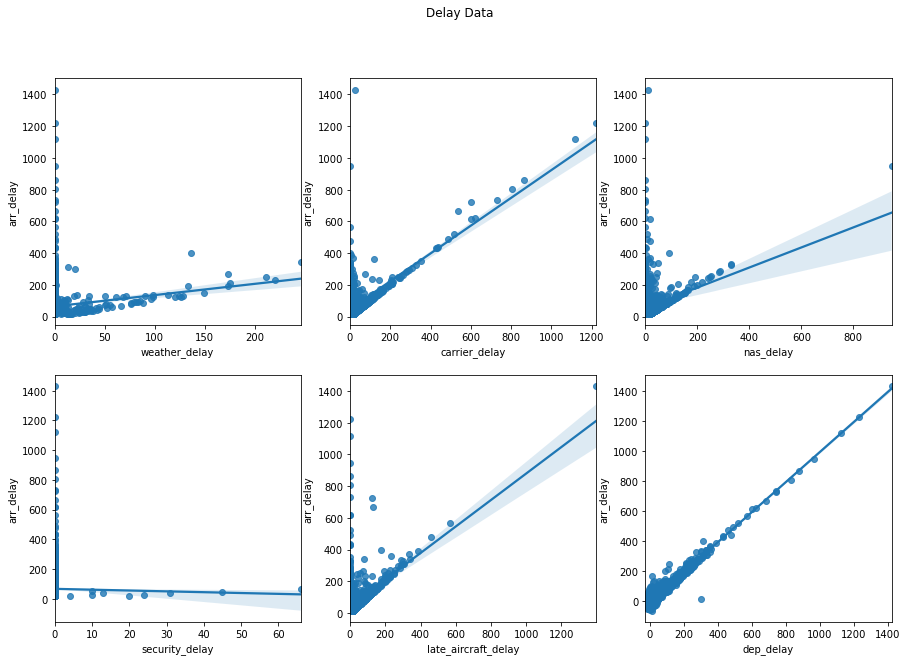

In [28]:
outliers = sample1[['origin_city_name','dest_city_name','arr_delay','dep_delay','weather_delay','carrier_delay','nas_delay','security_delay','late_aircraft_delay']]
outliers.head()

outliers = sample1[['origin_city_name','dest_city_name','arr_delay','dep_delay','weather_delay','carrier_delay','nas_delay','security_delay','late_aircraft_delay']]
outliers.head()

#create charts
fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Delay Data')

#weather_delay 
sns.regplot(x='weather_delay',y='arr_delay',data=outliers,ax=axes[0,0])

#carrier_delay
sns.regplot(x='carrier_delay',y='arr_delay',data=outliers,ax=axes[0,1])

#nas_delay 
sns.regplot(x='nas_delay',y='arr_delay',data=outliers,ax=axes[0,2])

#security_delay
sns.regplot(x='security_delay',y='arr_delay',data=outliers,ax=axes[1,0])

#late_aircraft_delay
sns.regplot(x='late_aircraft_delay',y='arr_delay',data=outliers,ax=axes[1,1])

#dep_delay
sns.regplot(x='dep_delay',y='arr_delay',data=outliers,ax=axes[1,2])

#### **Looking at Outlier Data (arr_delay>200)**

Text(0.5, 1.0, 'Sample2')

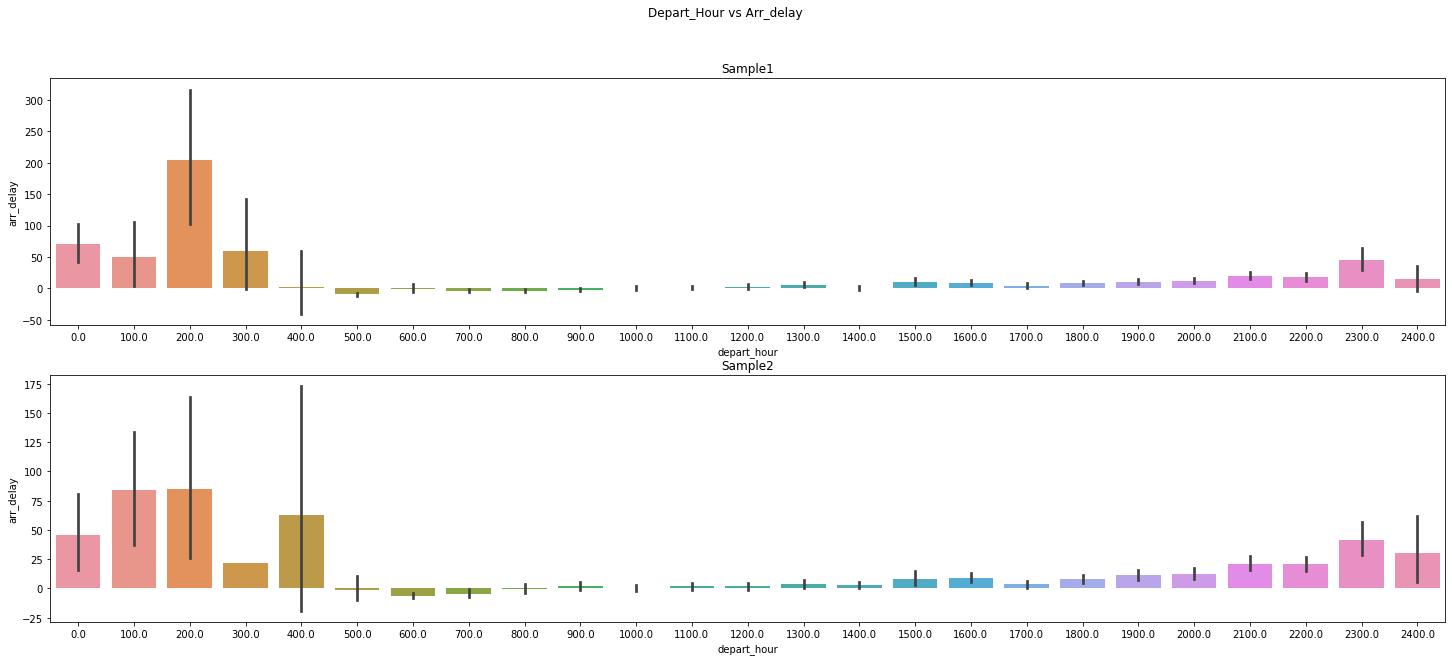

In [29]:
sample1['depart_hour'] = sample1['dep_time'].round(-2)
sample2['depart_hour'] = sample2['dep_time'].round(-2)

#create charts
fig, axes = plt.subplots(2, 1,figsize=(25,10))
fig.suptitle('Depart_Hour vs Arr_delay')

#sample1 
sns.barplot(x='depart_hour',y='arr_delay',data=sample1,ax=axes[0])
axes[0].set_title('Sample1')

#sample2
sns.barplot(x='depart_hour',y='arr_delay',data=sample2,ax=axes[1])
axes[1].set_title('Sample2')

## CRS_elasped time vs arr_delay

Text(0.5, 1.0, 'Sample1')

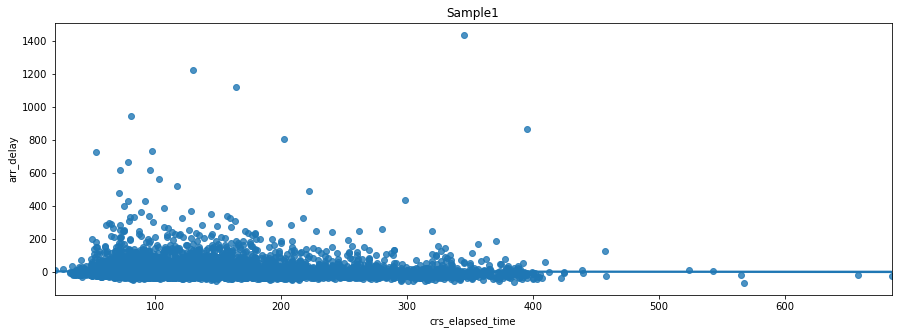

In [43]:
#create charts
fig, axes = plt.subplots(figsize=(15,5))

#sample1 
sns.regplot(x='crs_elapsed_time',y='arr_delay',data=sample1)
axes.set_title('Sample1')

In [47]:
late = sample1['arr_delay']>0
early = sample1['arr_delay']<0
on_time = sample1['arr_delay']==0

late_flights = sample1[late]
early_flights = sample1[early]
on_time_flights = sample1[on_time]

(186, 45)

In [77]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

display(missing_data)
display(data.shape)

,Total,Percent
no_name,50000,1.00000
total_add_gtime,49642,0.99284
first_dep_time,49642,0.99284
longest_add_gtime,49642,0.99284
cancellation_code,49173,0.98346
late_aircraft_delay,40654,0.81308
security_delay,40654,0.81308
nas_delay,40654,0.81308
weather_delay,40654,0.81308
carrier_delay,40654,0.81308


(50000, 42)